In [1]:
import pandas as pd
from tqdm import tqdm

In [507]:
book=pd.read_csv("C:/Users/nourl/Desktop/SR Livres/Books.csv",dtype={"Year-Of-Publication":"str"}, on_bad_lines='warn')


# books

In [508]:
book.rename(columns={'Book-Title':'title',"Book-Author":"author","Year-Of-Publication":'year',"Publisher":"publisher"},inplace=True)
book.reset_index(drop=True,inplace=True)
book.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [509]:
## Drop URL columns
book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
book.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### 1) ISBN

ISBN des livres est composé de 10 chiffre exemple : "185326119x" ou "0393045218"

In [510]:
for i in range(len(book)):
    if len(str(book.iloc[i,0]))!=10:
        print (book.iloc[i,:])
        print("_____________________________________________")

ISBN                                              0486404242\t
title        War in Kind: And Other Poems (Dover Thrift Edi...
author                                           Stephen Crane
year                                                      1998
publisher                                   Dover Publications
Name: 111808, dtype: object
_____________________________________________
ISBN                                   3518365479<90
title        Suhrkamp TaschenbÃ?Â¼cher, Nr.47, Frost
author                               Thomas Bernhard
year                                            1972
publisher                                   Suhrkamp
Name: 171206, dtype: object
_____________________________________________
ISBN                       3442248027  3
title        Diamond Age. Die Grenzwelt.
author                   Neal Stephenson
year                                2000
publisher                       Goldmann
Name: 251424, dtype: object
_______________________________________

In [511]:
#corrige les erreurs de ISBN: 
book.iloc[251649,0]='0385722206'
book.iloc[251424,0]='3442248027'
book.iloc[171206,0]='3518365479'
book.iloc[111808,0]='0486404242'

In [512]:
#remplacer les ISBN  _________X en _________x
book['ISBN'] = book['ISBN'].str.replace('X', 'x')


In [513]:
counts=book['ISBN'].value_counts()
counts

185326119x    2
006099486x    2
044991089x    2
086611873x    2
039552105x    2
             ..
1860461050    1
0553213067    1
156971634x    1
349223674x    1
0767409752    1
Name: ISBN, Length: 271044, dtype: int64

In [514]:
#exemple des livres dupliqués
for i in counts[counts>1].index:
    print(book[book.iloc[:,0]==i].iloc[:,[1,2]])
    print("________________________________________________")

                                          title           author
21723   The Jungle Book (Wordsworth Collection)  Rudyard Kipling
116461  The Jungle Book (Wordsworth Collection)  Rudyard Kipling
________________________________________________
                                                    title            author
3591    The Professor and the Madman: A Tale of Murder...  Simon Winchester
168738  The Professor and the Madman: A Tale of Murder...  Simon Winchester
________________________________________________
                   title       author
23122   The Greenlanders  Jane Smiley
162302  The Greenlanders  Jane Smiley
________________________________________________
                                                    title         author
21741   Alice In Wonderland Great Illustrated CL (Alic...  Lewis Carroll
200612  Alice In Wonderland Great Illustrated CL (Alic...  Lewis Carroll
________________________________________________
                                                

In [515]:
print("initial size",book.shape[0])
book=book.drop_duplicates(subset=['ISBN'])
book.reset_index(drop=True,inplace=True)
print("size after removing duplicates",book.shape[0])

initial size 271360
size after removing duplicates 271044


### 2) Author & Publisher

In [516]:
book.isnull().sum() 

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [517]:
book.loc[book["author"].isnull(),:]

,ISBN,title,author,year,publisher
187534,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [518]:
book.loc[book['publisher'].isnull(),:]


,ISBN,title,author,year,publisher
128811,193169656x,Tyrant Moon,Elaine Corvidae,2002,NaN
128958,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [519]:
for i in list(book.loc[book["author"].isnull(),:].index):
    book.loc[i,"author"]="inconnu"
for i in list(book.loc[book['publisher'].isnull(),:].index):
    book.loc[i,'publisher']="inconnu"

### 3 ) year 

In [520]:
book['year'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [521]:
book.loc[(book['year'] == 'DK Publishing Inc') | (book['year'] =="Gallimard") ,:]


,ISBN,title,author,year,publisher
209344,078946697x,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220513,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221454,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [522]:
#209344
book.loc[209344 ,'publisher'] = 'DK Publishing Inc'
book.loc[209344 ,'year'] = 2000
book.loc[209344 ,'title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
book.loc[209344 ,'author'] = 'Michael Teitelbaum'
#221454
book.loc[221454 ,'publisher'] = 'DK Publishing Inc'
book.loc[221454 ,'year'] = 2000
book.loc[221454 ,'title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
book.loc[221454 ,'author'] = 'James Buckley'
#220513
book.loc[220513 ,'publisher'] = 'Gallimard'
book.loc[220513 ,'year'] = '2003'
book.loc[220513 ,'title'] = 'Peuple du ciel - Suivi de Les bergers '
book.loc[220513 ,'author'] =  "Jean-Marie Gustave Le Clézio"

In [523]:
book['year'] = book["year"].astype(int)
print(sorted(book.year.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [524]:
#year >2012
correct_years=[1997,1991,1992,1999,1970,1998,1950,1959,1996,1974,1987,1961,1920,1971,1925,1937,1991]
for i,j in zip(book[book['year']>2012][["ISBN","year"]].values,correct_years):
    print(i,"---> correct year=",j)

['068160204x' 2020] ---> correct year= 1997
['0671746103' 2030] ---> correct year= 1991
['0671791990' 2030] ---> correct year= 1992
['0870449842' 2030] ---> correct year= 1999
['0140301690' 2050] ---> correct year= 1970
['068107468x' 2020] ---> correct year= 1998
['0140201092' 2050] ---> correct year= 1950
['0394701658' 2038] ---> correct year= 1959
['3442436893' 2026] ---> correct year= 1996
['0590085417' 2021] ---> correct year= 1974
['0870446924' 2030] ---> correct year= 1987
['0671266500' 2030] ---> correct year= 1961
['068471941x' 2020] ---> correct year= 1920
['0684718022' 2030] ---> correct year= 1971
['0380000059' 2024] ---> correct year= 1925
['068471809x' 2037] ---> correct year= 1937
['0671740989' 2030] ---> correct year= 1991


In [525]:
for i,j in zip(book[book['year']>2012]["ISBN"].index,correct_years):
    book.loc[i,'year']=j

In [526]:
# 0 < year < 1806

In [527]:
book[(book['year']<1806) & (book['year']>0)][["ISBN","year"]]

,ISBN,year
227296,9643112136,1378
253457,964442011x,1376


In [528]:
book.loc[227296,"year"]=2010
book.loc[253457,"year"]=2011

In [529]:
# year ==0
book[book['year']==0]

,ISBN,title,author,year,publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360x,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270478,014029953x,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270597,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
270778,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
270866,0887781721,Tom Penny,Tony German,0,P. Martin Associates


<AxesSubplot:>

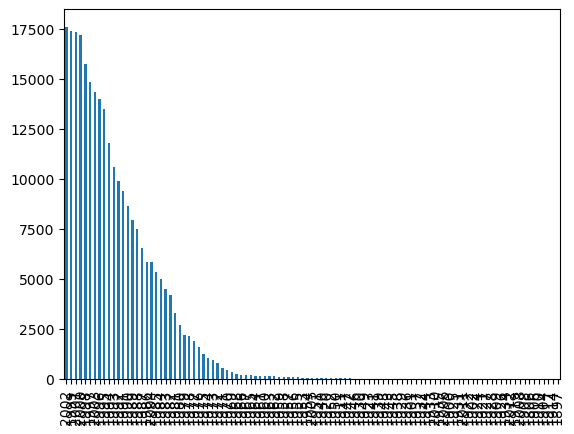

In [530]:
book[book['year']!=0]["year"].value_counts().plot(kind='bar')

# users 

In [400]:
user=pd.read_csv("C:/Users/nourl/Desktop/SR Livres/Users.csv")
user.rename(columns={"User-ID":'id','Location':'location','Age':'age'},inplace=True)

In [401]:
user.drop('id',axis=1,inplace=True)

In [402]:
user.isna().sum()

location         0
age         110762
dtype: int64

## age

In [403]:
user.age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [404]:
user.age=user.age.astype(float)

<AxesSubplot:>

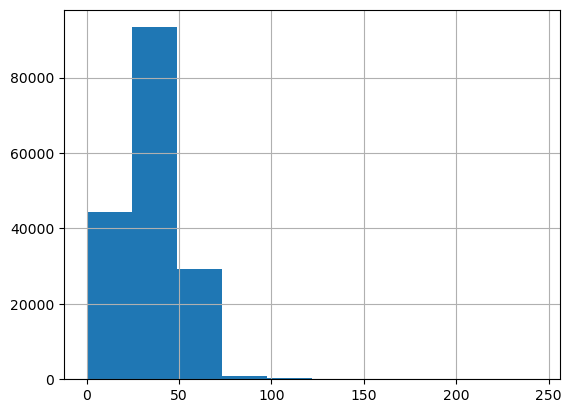

In [405]:
user.age.hist()

In [406]:
mean=round(user[(user.age>10) & (user.age < 80)]['age'].mean())

In [407]:
user.loc[(user.age<10) | (user.age > 80),'age']=mean
user.age.fillna(mean,inplace=True)

<AxesSubplot:>

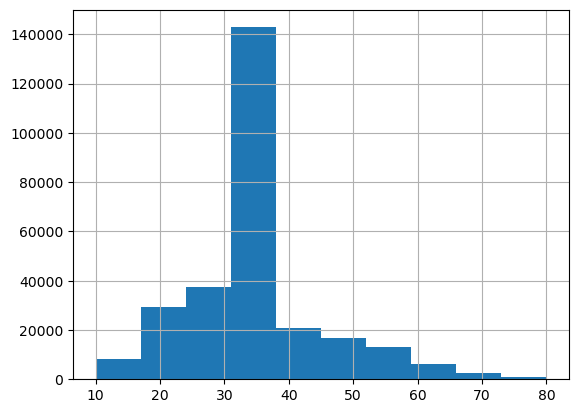

In [408]:
user.age.hist()

## location

In [409]:
user.location

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: location, Length: 278858, dtype: object

In [410]:
def valide(string):
    if string == ' ' or string == '' or string=='n/a' or string == ',':  
        return(False)
    return True


In [411]:
list_location=user.location.str.split(", ")

In [412]:
list_location

0                         [nyc, new york, usa]
1                  [stockton, california, usa]
2            [moscow, yukon territory, russia]
3                  [porto, v.n.gaia, portugal]
4         [farnborough, hants, united kingdom]
                          ...                 
278853                 [portland, oregon, usa]
278854    [tacoma, washington, united kingdom]
278855             [brampton, ontario, canada]
278856             [knoxville, tennessee, usa]
278857                  [dublin, n/a, ireland]
Name: location, Length: 278858, dtype: object

In [413]:

d={i+1:0 for i in range(9)}
for location in list_location :
    d[len(location)]+=1

In [414]:
d

{1: 1, 2: 4576, 3: 273257, 4: 970, 5: 48, 6: 3, 7: 2, 8: 0, 9: 1}

In [415]:
#correction des adresses qui contiennent 5 elements et
#les remplacer par une adresse de 3 elements city, state, country
user.loc[5641,'location'] = 'other, other, mexico'
user.loc[6557,'location'] = 'schiltigheim, alsace, france'
user.loc[9695,'location'] = 'other, other, mexico'
user.loc[12512,'location'] = 'nanaimo, british columbia, canada'
user.loc[43946,'location'] = 'vaubuzin, frolois, france'
user.loc[46964,'location'] = "seaview parkway, gulf view, trinidad and tobago"
user.loc[48738,'location'] = "mainz, rhineland palatinate, germany"
user.loc[55159,'location'] = 'newport, Wales, united kingdom'
user.loc[61675,'location'] = 'bracknell, berkshire, united kingdom'
user.loc[65857,'location'] ="geneva, florida, usa"
user.loc[66143,'location'] = "vita, sicilia, italy"
user.loc[66147,'location'] ='ioulís, kea, greece'
user.loc[82756,'location'] = 'mizunami, gifu, japan'
user.loc[83738,'location'] = 'listowel, ontario, canada'
user.loc[85108,'location'] = 'baloira, pontevedra, spain'
user.loc[97080,'location'] = 'bonn, rhine westphalia, germany'
user.loc[98124,'location'] = 'king ct,  green brook, usa'
user.loc[17884,'location'] = 'Mumbai, maharashtra, india'
user.loc[120092,'location'] = 'merrick, new york, united states'
user.loc[120835,'location'] = 'ndianapolis, indiana, united states'
user.loc[131301,'location'] = 'huelva, andalucia, españa'
user.loc[154405,'location'] = 'san rafael arriba, san josé, costa rica'
user.loc[155588,'location'] = 'other, dhaka, bangladesh'
user.loc[155733,'location'] = 'toronto, Ontario, canada'
user.loc[275707,'location'] = 'somers, victoria, australia'
user.loc[274054,'location'] = 'enschede, budapest, hungary'
user.loc[273290,'location'] = 'san ramon, alajuela, costa rica'
user.loc[270111,'location'] = 'bonn, köln, germany'
user.loc[266273,'location'] = 'isabela, basilan, philippines'
user.loc[264917,'location'] = 'zelezny brod, koberovy, czech republic'
user.loc[264458,'location'] = 'coimbra, oliveira do hospital, portugal'
user.loc[263333,'location'] = 'pooc occidental, tubigon, philippines'
user.loc[261650,'location'] = 'méxico, d.f., mexico'
user.loc[258217,'location'] = 'alajuela, san carlos, costa rica'
user.loc[255932,'location'] = 'san josé, san josé, costa rica'
user.loc[255786,'location'] = 'kristianstad, åhus, sweden'
user.loc[249300,'location'] = 'accra, accra, ghana'
user.loc[235579,'location'] = 'quetigny, côte d`or, france'
user.loc[230891,'location'] = 'other, other, france'
user.loc[228791,'location'] = 'mexico, d.f., mexico'
user.loc[225434,'location'] = 'lawrence, kansas, usa'
user.loc[212652,'location'] = 'other, other, usa'
user.loc[203908,'location'] = 'gold coast, queensland, australia'
user.loc[179621,'location'] = 'méxico, d.f., mexico'
user.loc[175617,'location'] = 'south sulawesi, makassar, indonesia'
user.loc[164758,'location'] = 'mexico, d.f., mexico'
user.loc[161512,'location'] = 'ota, ogun state, nigeria'
user.loc[158135,'location'] = 'durbanville, cape town, south africa'

In [416]:
#correction des adresse avec des elements differents de 5 et 3 et les transformer en une adresse avec 3 elements 
user.loc[76342,'location']='tijuana, baja california, mexico'
user.loc[122814,'location']='tubod, lanao del norte, philippines'
user.loc[258822,'location']='northern ireland, lurgan, united kingdom'
user.loc[194259,'location']='daejeon, other, south korea'
user.loc[215970,'location']='silver spring, maryland, usa'
user.loc[241302,'location']='thane, maharastra, india'
user.loc[134376,'location']='lawrenceville, other, usa'

In [418]:
list_location=user.location.str.split(", ")

In [420]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [421]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")

In [432]:
from itertools import combinations
string='moscow, yukon territory, russia'
def lat_long(string):  
    location=geolocator.geocode(string, timeout=10)
    if location==None:
        List=list(combinations(string.split(","),2))
        for i in range(len(List)):
            List[i]=List[i][0]+List[i][1]
            location=geolocator.geocode(List[i], timeout=10)
            if location!=None:
                break
    if location==None:
        return (pd.Series({'lat':None,'long':None}))
    else:
        return pd.Series({'lat':float(location.raw['lat']),'long':float(location.raw['lon'])})


In [433]:
test=user[:10]
test

,location,age
0,"nyc, new york, usa",35.0
1,"stockton, california, usa",18.0
2,"moscow, yukon territory, russia",35.0
3,"porto, v.n.gaia, portugal",17.0
4,"farnborough, hants, united kingdom",35.0
5,"santa monica, california, usa",61.0
6,"washington, dc, usa",35.0
7,"timmins, ontario, canada",35.0
8,"germantown, tennessee, usa",35.0
9,"albacete, wisconsin, spain",26.0


In [434]:
from tqdm import tqdm
tqdm.pandas()
test[['lat','long']]=(0,0)
test[['lat','long']]=test.location.progress_apply(lat_long)

C:\Users\nourl\AppData\Local\Temp\ipykernel_22136\2433704169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['lat','long']]=(0,0)
C:\Users\nourl\AppData\Local\Temp\ipykernel_22136\2433704169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['lat','long']]=(0,0)
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.04it/s]
C:\Users\nourl\AppData\Local\Temp\ipykernel_22136\2433704169.py:4: SettingWithCopyWarning: 
A value is trying to

In [435]:
test

,location,age,lat,long
0,"nyc, new york, usa",35.0,40.712728,-74.006015
1,"stockton, california, usa",18.0,37.957702,-121.290780
2,"moscow, yukon territory, russia",35.0,55.750446,37.617494
3,"porto, v.n.gaia, portugal",17.0,41.149451,-8.610788
4,"farnborough, hants, united kingdom",35.0,51.291869,-0.753984
5,"santa monica, california, usa",61.0,34.019470,-118.491227
6,"washington, dc, usa",35.0,38.895037,-77.036543
7,"timmins, ontario, canada",35.0,48.477473,-81.330414
8,"germantown, tennessee, usa",35.0,35.086758,-89.810086
9,"albacete, wisconsin, spain",26.0,38.995092,-1.855915


In [436]:
user

,location,age
0,"nyc, new york, usa",35.0
1,"stockton, california, usa",18.0
2,"moscow, yukon territory, russia",35.0
3,"porto, v.n.gaia, portugal",17.0
4,"farnborough, hants, united kingdom",35.0
...,...,...
278853,"portland, oregon, usa",35.0
278854,"tacoma, washington, united kingdom",50.0
278855,"brampton, ontario, canada",35.0
278856,"knoxville, tennessee, usa",35.0


# ratings 

In [531]:
rating=pd.read_csv("C:/Users/nourl/Desktop/SR Livres/Ratings.csv",dtype={"Year-Of-Publication":"str"}, on_bad_lines='warn')
rating.rename(columns={"User-ID":"id","Book-Rating":"rating"},inplace=True)

In [532]:
rating

,id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [534]:
rating['ISBN']=rating['ISBN'].str.replace("X","x")

In [541]:
for i in range(len(rating)):
    if len(str(rating.iloc[i,1]))==9:
        if(book[book['ISBN']==(str(rating.iloc[i,1])+'x')]) or (book[book['ISBN']==('0'+str(rating.iloc[i,1]))])

Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title, author, year, publisher]
Index: []
Empty DataFrame
Columns: [ISBN, title,

In [499]:
book[book["ISBN"]=="038000293x"]

,User-ID,ISBN,Book-Rating


In [553]:
for i in range(len(rating)):
    if len(rating.iloc[i,1])==9:
        if rating.iloc[i,1].isnumeric()==False and rating.iloc[i,1][-1]!='x':
            print(i,rating.iloc[i,1])

9745 100940/86
9749 127420/98
9759 194114/03
9762 203671/03
14849 30/6646/1
34305 M79702002
55340 121613/98
55342 1378/1997
56579 24.340/88
58902 B.1086903
65475 B.2893468
89172 CALLAGHEN
91838 NONESHOWN
106317 167334U30
151303 NANCYDREW
186984 CDD869935
193131 187786/02
204750 52/1564/5
208263 Y99697115
219063 V16382000
226054 0451W6306
231292 30/1630/0
231293 30/7456/4
231294 30/7516/5
231295 30/7640/3
299992 M79702002
308004 LC7180738
343308 M79702002
350639 B77801958
350667 80690(22)
371009 1378/1997
372546 197033/03
372547 199757/03
397663 115092/97
402999 O37348388
403532 24.340/88
420428 02656x125
423268 2408/0001
465411 451J71121
469728 451AE7709
499388 M79702002
571413 M79702002
571820 NAMORZAID
631841 BOOKBOx12
631842 BOOKBOx13
631843 BOOKBOx14
631844 BOOKBOx15
651073 B.5814227
651074 B76011970
661587 O31678104
679961 192093/03
706352 BOOKBOx12
706353 BOOKBOx13
706354 BOOKBOx14
706355 BOOKBOx15
713444 B0000xFA5
713445 B0005W7ZE
727979 O14401601
736343 134627/99
737081 NAMORZA

In [551]:
rating.iloc[34305,1][-1]

'2'